# Exploring Used Car Listings on eBay Kleinanzeige

We will be working on a dataset of used cars from eBay Kleinanzeigen, a classifieds section of the German eBay website.

The dataset was originally scraped and uploaded to Kaggle. The version of the dataset we are working with is a sample of 50,000 data points that was prepared by Dataquest which includes simulating an uncleaned version of the data.

The data dictionary provided with data is as follows:

- dateCrawled - When this ad was first crawled. All field-values are taken from this date.
- name - Name of the car.
- seller - Whether the seller is private or a dealer.
- offerType - The type of listing
- price - The price on the ad to sell the car.
- abtest - Whether the listing is included in an A/B test.
- vehicleType - The vehicle Type.
- yearOfRegistration - The year in which which year the car was first registered.
- gearbox - The transmission type.
- powerPS - The power of the car in PS. PS stands for Pferdestärke which is Horsepower in German.
- model - The car model name.
- kilometer - How many kilometers the car has driven.
- monthOfRegistration - The month in which which year the car was first registered.
- fuelType - What type of fuel the car uses.
- brand - The brand of the car.
- notRepairedDamage - If the car has a damage which is not yet repaired.
- dateCreated - The date on which the eBay listing was created.
- nrOfPictures - The number of pictures in the ad.
- postalCode - The postal code for the location of the vehicle.
- lastSeenOnline - When the crawler saw this ad last online.


First, I will be cleaning the data, and then analyzing the data using Pandas and MatPlotLib.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

%matplotlib inline 
matplotlib.rcParams['figure.figsize'] = (13, 8) # set default figure size

# allowing for any single variable to print out without using the print statement:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [2]:
# importing the data:
autos = pd.read_csv('data/autos.csv', encoding = 'Latin-1')

In [3]:
autos.head()

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,odometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,nrOfPictures,postalCode,lastSeen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


In [4]:
autos.shape

(50000, 20)

In [5]:
autos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 20 columns):
dateCrawled            50000 non-null object
name                   50000 non-null object
seller                 50000 non-null object
offerType              50000 non-null object
price                  50000 non-null object
abtest                 50000 non-null object
vehicleType            44905 non-null object
yearOfRegistration     50000 non-null int64
gearbox                47320 non-null object
powerPS                50000 non-null int64
model                  47242 non-null object
odometer               50000 non-null object
monthOfRegistration    50000 non-null int64
fuelType               45518 non-null object
brand                  50000 non-null object
notRepairedDamage      40171 non-null object
dateCreated            50000 non-null object
nrOfPictures           50000 non-null int64
postalCode             50000 non-null int64
lastSeen               50000 non-null obj

Let's rename some of the columns to be a bit more informative and easier to work with:

In [6]:
autos.columns = ['date_crawled', 'name', 'seller', 'offer_type', 'price_usd', 'ab_test',
       'vehicle_type', 'registration_year', 'gearbox', 'power_ps', 'model',
       'odometer_km', 'registration_month', 'fuel_type', 'brand',
       'unrepaired_damage', 'ad_created', 'num_pictures', 'postal_code',
       'last_seen']

autos.head()

,date_crawled,name,seller,offer_type,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,privat,Angebot,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,0,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,privat,Angebot,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,0,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,privat,Angebot,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,0,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,privat,Angebot,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,0,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,privat,Angebot,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,0,39218,2016-04-01 14:38:50


# Cleaning the Data

Now let's do some basic data exploration to determine what other cleaning tasks need to be done. 

Initially we will look for: 

- Text columns where all or almost all values are the same. These can often be dropped as they don't have useful information for analysis. 

- Examples of numeric data stored as text which can be cleaned and converted.


In [7]:
autos.describe(include='all')

,date_crawled,name,seller,offer_type,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,num_pictures,postal_code,last_seen
count,50000,50000,50000,50000,50000,50000,44905,50000.000000,47320,50000.000000,47242,50000,50000.000000,45518,50000,40171,50000,50000.0,50000.000000,50000
unique,48213,38754,2,2,2357,2,8,NaN,2,NaN,245,13,NaN,7,40,2,76,NaN,NaN,39481
top,2016-03-22 09:51:06,Ford_Fiesta,privat,Angebot,$0,test,limousine,NaN,manuell,NaN,golf,"150,000km",NaN,benzin,volkswagen,nein,2016-04-03 00:00:00,NaN,NaN,2016-04-07 06:17:27
freq,3,78,49999,49999,1421,25756,12859,NaN,36993,NaN,4024,32424,NaN,30107,10687,35232,1946,NaN,NaN,8
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2005.073280,NaN,116.355920,NaN,NaN,5.723360,NaN,NaN,NaN,NaN,0.0,50813.627300,NaN
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,105.712813,NaN,209.216627,NaN,NaN,3.711984,NaN,NaN,NaN,NaN,0.0,25779.747957,NaN
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1000.000000,NaN,0.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.0,1067.000000,NaN
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1999.000000,NaN,70.000000,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,0.0,30451.000000,NaN
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2003.000000,NaN,105.000000,NaN,NaN,6.000000,NaN,NaN,NaN,NaN,0.0,49577.000000,NaN
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2008.000000,NaN,150.000000,NaN,NaN,9.000000,NaN,NaN,NaN,NaN,0.0,71540.000000,NaN


In [8]:
autos.seller.unique()
autos.offer_type.unique()

array(['privat', 'gewerblich'], dtype=object)

array(['Angebot', 'Gesuch'], dtype=object)

In [9]:
autos.num_pictures.unique()

array([0], dtype=int64)

It seems that `offer_type` and `seller` are mostly just one value with 49,999 values saying "Angebot" and "privat" - also the `num_pictures` column is also not of any use to use - so let's delete those 3 columns.

In [10]:
autos = autos.drop(columns=['offer_type', 'seller', 'num_pictures'])
autos.head()

,date_crawled,name,price_usd,ab_test,vehicle_type,registration_year,gearbox,power_ps,model,odometer_km,registration_month,fuel_type,brand,unrepaired_damage,ad_created,postal_code,last_seen
0,2016-03-26 17:47:46,Peugeot_807_160_NAVTECH_ON_BOARD,"$5,000",control,bus,2004,manuell,158,andere,"150,000km",3,lpg,peugeot,nein,2016-03-26 00:00:00,79588,2016-04-06 06:45:54
1,2016-04-04 13:38:56,BMW_740i_4_4_Liter_HAMANN_UMBAU_Mega_Optik,"$8,500",control,limousine,1997,automatik,286,7er,"150,000km",6,benzin,bmw,nein,2016-04-04 00:00:00,71034,2016-04-06 14:45:08
2,2016-03-26 18:57:24,Volkswagen_Golf_1.6_United,"$8,990",test,limousine,2009,manuell,102,golf,"70,000km",7,benzin,volkswagen,nein,2016-03-26 00:00:00,35394,2016-04-06 20:15:37
3,2016-03-12 16:58:10,Smart_smart_fortwo_coupe_softouch/F1/Klima/Pan...,"$4,350",control,kleinwagen,2007,automatik,71,fortwo,"70,000km",6,benzin,smart,nein,2016-03-12 00:00:00,33729,2016-03-15 03:16:28
4,2016-04-01 14:38:50,Ford_Focus_1_6_Benzin_TÜV_neu_ist_sehr_gepfleg...,"$1,350",test,kombi,2003,manuell,0,focus,"150,000km",7,benzin,ford,nein,2016-04-01 00:00:00,39218,2016-04-01 14:38:50


## Exploring Odometer and Price


First, let's turn the `price` and `odometer` into integer types.

In [11]:
# turning price into integers:
autos.price_usd = autos.price_usd.str.replace(r'[\D]+', '').astype(int)
autos.price_usd.head()

0    5000
1    8500
2    8990
3    4350
4    1350
Name: price_usd, dtype: int32

In [12]:
# turning odometer into integers:
autos.odometer_km = autos.odometer_km.str.replace(r'[\D]+', '').astype(int)
autos.odometer_km.head()

0    150000
1    150000
2     70000
3     70000
4    150000
Name: odometer_km, dtype: int32

In [13]:
# checking for outliers in odometer column
autos.odometer_km.value_counts()

150000    32424
125000     5170
100000     2169
90000      1757
80000      1436
70000      1230
60000      1164
50000      1027
5000        967
40000       819
30000       789
20000       784
10000       264
Name: odometer_km, dtype: int64

In [14]:
autos.odometer_km.describe()

count     50000.000000
mean     125732.700000
std       40042.211706
min        5000.000000
25%      125000.000000
50%      150000.000000
75%      150000.000000
max      150000.000000
Name: odometer_km, dtype: float64

It looks as if the entries for input in the odometer column when listing the car was in a **dropdown** menu and that most of the cars had *at least* 150,000 kilometers. 

Text(0.5, 0, 'Odometer Category in KM')

Text(0, 0.5, 'Count')

Text(0.5, 1.0, 'Odometer Spread in Cars Listed on German Ebay')

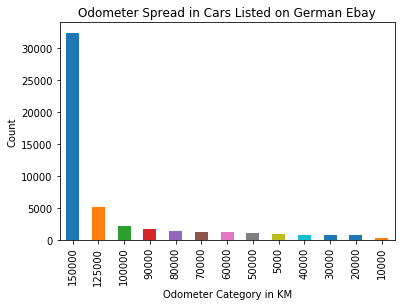

In [15]:
autos.odometer_km.value_counts().plot(kind='bar')
plt.xlabel('Odometer Category in KM')
plt.ylabel('Count')
plt.title('Odometer Spread in Cars Listed on German Ebay')

Let's take a look at price.

In [16]:
# checking for outliers in price column
autos.price_usd.value_counts().head(15)

0       1421
500      781
1500     734
2500     643
1000     639
1200     639
600      531
800      498
3500     498
2000     460
999      434
750      433
900      420
650      419
850      410
Name: price_usd, dtype: int64

In [17]:
# total number of unique prices
len(autos.price_usd.unique())

2357

In [18]:
autos.price_usd.describe()

count    5.000000e+04
mean     9.840044e+03
std      4.811044e+05
min      0.000000e+00
25%      1.100000e+03
50%      2.950000e+03
75%      7.200000e+03
max      1.000000e+08
Name: price_usd, dtype: float64

There are 1,421 cars in our data-set with a price of 0 dollars. These might skew the data and we might consider removing these rows to do our analysis since people wouldn't be selling their car for $0 - this is just to get attention of buyers perhaps.

In [19]:
# removing rows that have a price of $0
autos = autos[autos.price_usd > 0]

What's also interesting is there is a max price for a car listed at $100,000,000 - that is outrageous and should definitely be considered an outlier. Let's take a look at the higher prices.

In [20]:
# checking out cars listed over $100,000
'How many cars over $100,000?'
autos[autos.price_usd > 100000].shape[0]

"Let's take a look at them:"
autos[autos.price_usd > 100000].sort_values(by='price_usd', ascending=False).loc[:,['name','price_usd']].head(20)

'How many cars over $100,000?'

53

"Let's take a look at them:"

,name,price_usd
39705,Tausch_gegen_gleichwertiges,99999999
42221,Leasinguebernahme,27322222
39377,Tausche_volvo_v40_gegen_van,12345678
27371,Fiat_Punto,12345678
47598,Opel_Vectra_B_1_6i_16V_Facelift_Tuning_Showcar...,12345678
2897,Escort_MK_1_Hundeknochen_zum_umbauen_auf_RS_2000,11111111
24384,Schlachte_Golf_3_gt_tdi,11111111
11137,suche_maserati_3200_gt_Zustand_unwichtig_laufe...,10000000
47634,Ferrari_FXX,3890000
7814,Ferrari_F40,1300000


In [21]:
# checking out cars listed under $100
'How many cars under $100?'
autos[autos.price_usd < 100].shape[0]

"Let's take a look at them:"
autos[autos.price_usd < 100].sort_values(by='price_usd').loc[:,['name','price_usd']].head()

autos[autos.price_usd < 100].price_usd.value_counts().head(10)

'How many cars under $100?'

341

"Let's take a look at them:"

,name,price_usd
23037,Tausche_meinen_Golf_3_Cabrio_mit_wenig_Km,1
21614,VW_Golf_2__1.6l_Schlachtfest,1
21898,Golf_2_teile,1
22294,Suche_Ami_V8,1
23183,Tausche_Audi_A3/S3_1_8T_gegen_Cabrio_oder_ande...,1


1     156
50     49
99     19
80     15
70     10
60      9
10      7
30      7
40      6
65      5
Name: price_usd, dtype: int64

Given that eBay is an auction site, there could legitimately be items where the opening bid is 1 dollar. We will keep the 1 dollar items, but remove anything above 350,000 dollars, since it seems that prices increase steadily to that number and then jump up to less realistic numbers.

In [22]:
# removing rows that have a price greater than $350,000
autos = autos[autos.price_usd < 351000]

In [23]:
autos[autos.price_usd > 100000].sort_values(by='price_usd', ascending=False).loc[:,['name','price_usd']].head(10)

,name,price_usd
36818,Porsche_991,350000
14715,Rolls_Royce_Phantom_Drophead_Coupe,345000
34723,Porsche_Porsche_911/930_Turbo_3.0__deutsche_Au...,299000
35923,Porsche_911_Targa_Exclusive_Edition__1_von_15_...,295000
12682,Porsche_GT3_RS__PCCB__Lift___grosser_Exklusiv_...,265000
47337,BMW_Z8_roadster,259000
38299,Glas_BMW_mit_Wasser,250000
37840,Porsche_997,220000
40918,Porsche_911_991_GT3_RS,198000
43668,Porsche_993/911_Turbo_WLS_II_Exclusive_S_deuts...,197000


Text(0.5, 0, 'Price USD')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Car Prices in Ebay Germany')

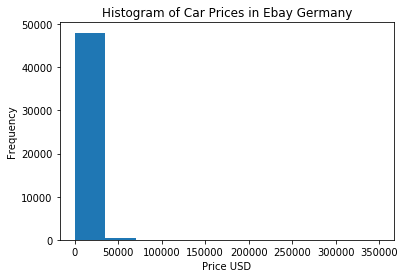

In [97]:
autos.price_usd.plot(kind='hist')
plt.xlabel('Price USD')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices in Ebay Germany')

Let's look at the histogram of price if we look at values between 0 and 30,000.

Text(0.5, 0, 'Price USD')

Text(0, 0.5, 'Frequency')

Text(0.5, 1.0, 'Histogram of Car Prices in Ebay Germany')

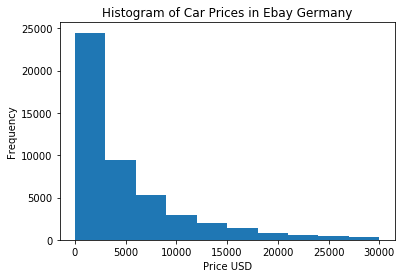

In [98]:
autos[autos.price_usd.between(0, 30000)].price_usd.plot(kind='hist')
plt.xlabel('Price USD')
plt.ylabel('Frequency')
plt.title('Histogram of Car Prices in Ebay Germany')

Text(0.5, 1.0, 'Box Plot of Car Prices in Ebay Germany')

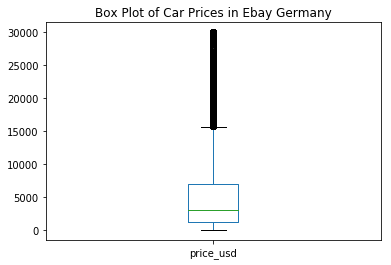

In [99]:
autos[autos.price_usd.between(0, 30000)].price_usd.plot(kind='box')
plt.title('Box Plot of Car Prices in Ebay Germany')

In [27]:
autos["price_usd"].describe()

count     48565.000000
mean       5888.935591
std        9059.854754
min           1.000000
25%        1200.000000
50%        3000.000000
75%        7490.000000
max      350000.000000
Name: price_usd, dtype: float64

# Exploring the Date Columns

There are a number of columns with date information:
```
date_crawled
registration_month
registration_year
ad_created
last_seen
```

Let's explore some of these columns:

In [28]:
autos[['date_crawled', 'last_seen']][0:5]

,date_crawled,last_seen
0,2016-03-26 17:47:46,2016-04-06 06:45:54
1,2016-04-04 13:38:56,2016-04-06 14:45:08
2,2016-03-26 18:57:24,2016-04-06 20:15:37
3,2016-03-12 16:58:10,2016-03-15 03:16:28
4,2016-04-01 14:38:50,2016-04-01 14:38:50


Checking to see when the crawler ran. This is pertinent because when the crawler runs and sees a new entry, it will record the time it picked up the information. This shows the date that any new listing is created.

In [29]:
autos["date_crawled"].str[:10].value_counts(dropna=False).sort_index()

2016-03-05    1230
2016-03-06     682
2016-03-07    1749
2016-03-08    1617
2016-03-09    1607
2016-03-10    1563
2016-03-11    1582
2016-03-12    1793
2016-03-13     761
2016-03-14    1775
2016-03-15    1665
2016-03-16    1438
2016-03-17    1536
2016-03-18     627
2016-03-19    1689
2016-03-20    1840
2016-03-21    1815
2016-03-22    1602
2016-03-23    1565
2016-03-24    1425
2016-03-25    1535
2016-03-26    1564
2016-03-27    1510
2016-03-28    1693
2016-03-29    1656
2016-03-30    1636
2016-03-31    1546
2016-04-01    1636
2016-04-02    1723
2016-04-03    1875
2016-04-04    1772
2016-04-05     636
2016-04-06     154
2016-04-07      68
Name: date_crawled, dtype: int64

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Number of New Listings')

Text(0.5, 1.0, 'Listings Generated Per Day')

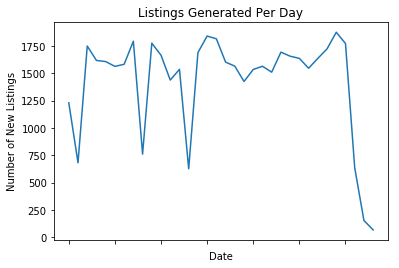

In [30]:
autos["date_crawled"].str[:10].value_counts(dropna=False).sort_index().plot()
plt.xlabel('Date')
plt.ylabel('Number of New Listings')
plt.title('Listings Generated Per Day')

Let's check the last seen column. This is pertinent because if the listing was not seen after this date, we can assume the car was sold - so we can see the assumed sell rate of the car.

In [31]:
autos["last_seen"].str[:10].value_counts(dropna=False).sort_index()

2016-03-05       52
2016-03-06      210
2016-03-07      262
2016-03-08      360
2016-03-09      466
2016-03-10      518
2016-03-11      601
2016-03-12     1155
2016-03-13      432
2016-03-14      612
2016-03-15      771
2016-03-16      799
2016-03-17     1364
2016-03-18      357
2016-03-19      769
2016-03-20     1003
2016-03-21     1002
2016-03-22     1038
2016-03-23      900
2016-03-24      960
2016-03-25      933
2016-03-26      816
2016-03-27      760
2016-03-28     1013
2016-03-29     1085
2016-03-30     1203
2016-03-31     1155
2016-04-01     1107
2016-04-02     1210
2016-04-03     1224
2016-04-04     1189
2016-04-05     6059
2016-04-06    10772
2016-04-07     6408
Name: last_seen, dtype: int64

The last three days contain a disproportionate amount of 'last seen' values. Given that these are 6-10x the values from the previous days, it's unlikely that there was a massive spike in sales, and more likely that these values are to do with the crawling period ending and don't indicate car sales. We'll take a look at car sale statistics for each day without the last 3 days then:

Text(0.5, 0, 'Date')

Text(0, 0.5, 'Presumed Cars Sold')

Text(0.5, 1.0, 'Listings Removed Per Day')

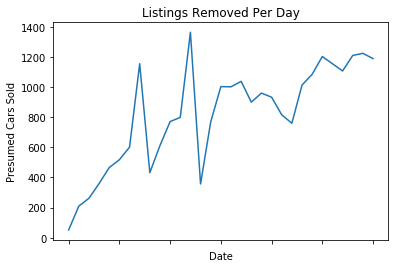

In [32]:
autos["last_seen"].str[:10].value_counts(dropna=False).sort_index().iloc[0:-3].plot()
plt.xlabel('Date')
plt.ylabel('Presumed Cars Sold')
plt.title('Listings Removed Per Day')

## Registration Year - Age of Car

Let's explore the `registration_year` column since the year that the car was first registered will likely indicate the age of the car.

In [33]:
autos.registration_year.describe()

count    48565.000000
mean      2004.755421
std         88.643887
min       1000.000000
25%       1999.000000
50%       2004.000000
75%       2008.000000
max       9999.000000
Name: registration_year, dtype: float64

Looking at this column, we note some odd values. The minimum value is 1000, long before cars were invented and the maximum is 9999, many years into the future. Let's fix this:

In [34]:
# seeing how many extraneous values we have:
"Count of registration_year vehicles above 2019:"
autos[autos.registration_year > 2019].registration_year.value_counts()

"Count of registration_year vehicles below 1930:"
autos[autos.registration_year < 1930].registration_year.value_counts()

'Count of registration_year vehicles above 2019:'

5000    4
9999    3
8888    1
4800    1
5911    1
6200    1
4100    1
4500    1
9000    1
2800    1
Name: registration_year, dtype: int64

'Count of registration_year vehicles below 1930:'

1910    5
1800    2
1001    1
1111    1
1929    1
1927    1
1000    1
Name: registration_year, dtype: int64

In [35]:
# removing these strange values:
autos = autos[autos.registration_year.between(1930, 2020)]

In [36]:
# adding a row for "age" of the vehicle
autos['age'] = 2019 - autos.registration_year

In [51]:
autos.age.describe()

count    48538.000000
mean        15.525753
std          7.491389
min          0.000000
25%         11.000000
50%         15.000000
75%         20.000000
max         88.000000
Name: age, dtype: float64

Text(0.5, 0, 'Age of Car')

Text(0, 0.5, 'Price in USD')

Text(0.5, 1.0, 'Age of Car vs Price')

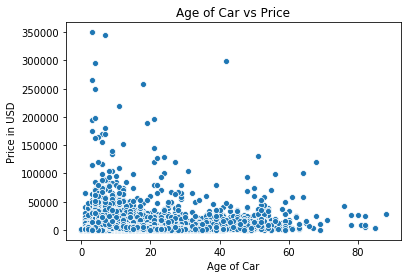

In [100]:
sns.scatterplot(x='age', y='price_usd', data=autos)
plt.xlabel('Age of Car')
plt.ylabel('Price in USD')
plt.title('Age of Car vs Price')

Looks like the mean age of our vehicles are about 15 years old with most of our values falling between 11-20 years old. Judging by the age of the car and the price - it does seem like newer cars are going to be more expensive than older cars - but with understandably many outliers.

# Exploring Costs of Vehicles by Brand.

In [96]:
# let's take a look at brands we have data for:
autos.brand.value_counts()

volkswagen        10331
bmw                5273
opel               5272
mercedes_benz      4650
audi               4168
ford               3381
renault            2324
peugeot            1430
fiat               1262
seat                919
skoda               780
nissan              741
mazda               739
smart               694
citroen             685
toyota              611
hyundai             483
sonstige_autos      467
volvo               439
mini                418
mitsubishi          397
honda               388
kia                 345
alfa_romeo          321
porsche             287
suzuki              286
chevrolet           275
chrysler            169
dacia               129
daihatsu            122
jeep                107
subaru              102
land_rover           99
saab                 79
daewoo               76
jaguar               74
trabant              66
rover                65
lancia               55
lada                 29
Name: brand, dtype: int64

In [75]:
# let's get the average asking price for each brand:
brands = autos.brand.unique().tolist()

# dictionary to store values
brand_price = {}

for brand in brands:
    # setting each brand to the average price
    brand_price[brand] = round(autos.loc[autos.brand == brand, 'price_usd'].mean())

In [91]:
# let's take a look!

brand_price_df = pd.DataFrame.from_dict(brand_price, orient='index', columns=['average_price'])

'Top 10 most expensive:'
brand_price_df.sort_values(by='average_price', ascending=False).head(10)

'Top 10 least expensive:'
brand_price_df.sort_values(by='average_price').head(10)

'Top 10 most expensive:'

,average_price
porsche,45624
land_rover,18934
sonstige_autos,12235
jeep,11590
jaguar,11526
mini,10542
audi,9213
mercedes_benz,8527
bmw,8261
chevrolet,6620


'Top 10 least expensive:'

,average_price
daewoo,1079
rover,1586
daihatsu,1628
trabant,1817
renault,2432
lada,2648
fiat,2794
opel,2942
peugeot,3066
lancia,3182


Text(0.5, 1.0, 'Most Expensive Cars in our Data Set')

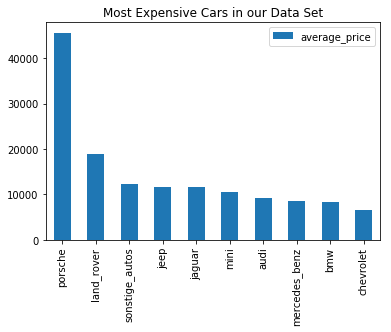

In [94]:
brand_price_df.sort_values(by='average_price', ascending=False).head(10).plot(kind='bar')
plt.title('Most Expensive Cars in our Data Set')

Text(0.5, 1.0, 'Least Expensive Cars in our Data Set')

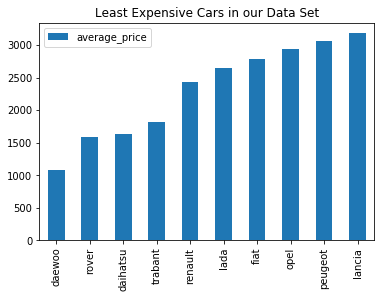

In [95]:
brand_price_df.sort_values(by='average_price').head(10).plot(kind='bar')
plt.title('Least Expensive Cars in our Data Set')